# EECE 490 - Introduction to Machine Learning
### Spring 2021-2022
Group Members: 


*   Abou Shaar, Mansour
*   Al Skaff, Karl
*   Deek, Karl
*   Eid El Beyrouthy, Farid
*   Wakim, Joe
*   Zein, Frederic


## Topic: **Improving Early Cancer Detection Based on Liquid Biopsy Using Machine Learning**

### 1.Loading and Cleaning the dataset

a. Loading

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('Tables.xlsx', index_col = 0, sheet_name = "Table S6")

columns = ["Sample ID #", "Tumor type", "AJCC Stage","AFP (pg/ml)","Angiopoietin-2 (pg/ml)","AXL (pg/ml)",
           "CA-125 (U/ml)","CA 15-3 (U/ml)","CA19-9 (U/ml)","CD44 (ng/ml)","CEA (pg/ml)","CYFRA 21-1 (pg/ml)","DKK1 (ng/ml)",
           "Endoglin (pg/ml)","FGF2 (pg/ml)","Follistatin (pg/ml)","Galectin-3 (ng/ml)","G-CSF (pg/ml)","GDF15 (ng/ml)","HE4 (pg/ml)",
           "HGF (pg/ml)","IL-6 (pg/ml)","IL-8 (pg/ml)","Kallikrein-6 (pg/ml)","Leptin (pg/ml)","Mesothelin (ng/ml)","Midkine (pg/ml)",
           "Myeloperoxidase (ng/ml)","NSE (ng/ml)","OPG (ng/ml)","OPN (pg/ml)","PAR (pg/ml)","Prolactin (pg/ml)","sEGFR (pg/ml)",
           "sFas (pg/ml)","SHBG (nM)","sHER2/sEGFR2/sErbB2 (pg/ml)","sPECAM-1 (pg/ml)","TGFa (pg/ml)","Thrombospondin-2 (pg/ml)","TIMP-1 (pg/ml)","TIMP-2 (pg/ml)","CancerSEEK Logistic Regression Score","CancerSEEK Test Result"]
df = df.set_axis(columns, axis=1, inplace=False)
df=df.tail(-3)


b. Clean numerical data (contains asterisks)

In [ ]:
numeric = columns[3:42]

for num in numeric:
  df[num] = df[num].map(lambda v: str(v).split('*')[-1])
  df = df[df[num]!="nan"]
  df[num] = pd.to_numeric(df[num])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


c. Convert tumor type to binary dummies (Normal, Liver, Pancreas, etc.)

In [ ]:
#tranform TumorType(type of cancer or healthy) into numeric
#one hot encoding
df = pd.get_dummies(df,columns = ["Tumor type","AJCC Stage"])

d. Handle missing values and duplicates

In [ ]:
df.dtypes
import numpy as np
#remove row with more than 3 missing values
# we will use the function for displaying
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing = missing_values_table(df)
print(missing)

Your selected dataframe has 54 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [ ]:
#checking if they is any duplicate
duplicated = df.duplicated()
print("There are (is) "+ str(duplicated.any().sum())+ " duplicated row(s)")

There are (is) 0 duplicated row(s)


e. Filter 'interesting' columns

In [ ]:
intersting_columns =  ["Tumor type_Normal", "AJCC Stage_I","AJCC Stage_II","AJCC Stage_III","AFP (pg/ml)","Angiopoietin-2 (pg/ml)","AXL (pg/ml)",
           "CA-125 (U/ml)","CA 15-3 (U/ml)","CA19-9 (U/ml)","CD44 (ng/ml)","CEA (pg/ml)","CYFRA 21-1 (pg/ml)","DKK1 (ng/ml)",
           "Endoglin (pg/ml)","FGF2 (pg/ml)","Follistatin (pg/ml)","Galectin-3 (ng/ml)","G-CSF (pg/ml)","GDF15 (ng/ml)","HE4 (pg/ml)",
           "HGF (pg/ml)","IL-6 (pg/ml)","IL-8 (pg/ml)","Kallikrein-6 (pg/ml)","Leptin (pg/ml)","Mesothelin (ng/ml)","Midkine (pg/ml)",
           "Myeloperoxidase (ng/ml)","NSE (ng/ml)","OPG (ng/ml)","OPN (pg/ml)","PAR (pg/ml)","Prolactin (pg/ml)","sEGFR (pg/ml)",
           "sFas (pg/ml)","SHBG (nM)","sHER2/sEGFR2/sErbB2 (pg/ml)","sPECAM-1 (pg/ml)","TGFa (pg/ml)","Thrombospondin-2 (pg/ml)","TIMP-1 (pg/ml)","TIMP-2 (pg/ml)"]
df_corr = df[intersting_columns].corr()["Tumor type_Normal"]

f. Visualize 2D plots (identify possible clustering)

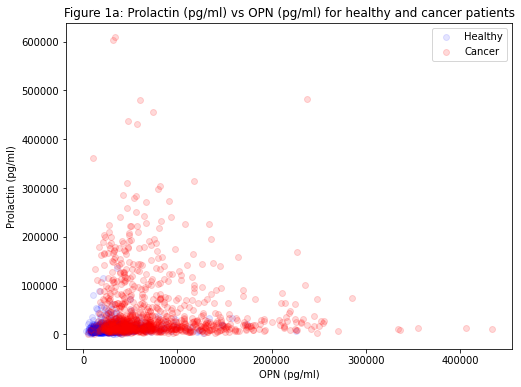

In [ ]:
# Visualize the data using Matplotlib
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,6))

#filter healthy patients and plot levels of Glucose vs BMI
healthy = df[df["Tumor type_Normal"] == 1]   
plt.scatter(        
    healthy['OPN (pg/ml)'],        
    healthy['Prolactin (pg/ml)'],
    color="blue",        
    alpha=0.1,        
    label="Healthy")
#filter diabete patients and plot levels of Glucose vs BMI
cancerI = df[(df["Tumor type_Normal"] == 0)] 
plt.scatter(        
    cancerI['OPN (pg/ml)'],        
    cancerI['Prolactin (pg/ml)'],
    color="red",        
    alpha=0.15,        
    label="Cancer")

plt.xlabel('OPN (pg/ml)')
plt.ylabel('Prolactin (pg/ml)')
plt.title('Figure 1a: Prolactin (pg/ml) vs OPN (pg/ml) for healthy and cancer patients')
plt.legend(loc='upper right')
plt.show()

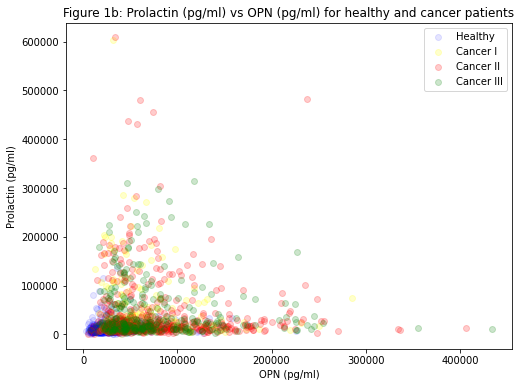

In [ ]:
# Visualize the data using Matplotlib
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,6))

#filter healthy patients and plot levels of Glucose vs BMI
healthy = df[df["Tumor type_Normal"] == 1]   
plt.scatter(        
    healthy['OPN (pg/ml)'],        
    healthy['Prolactin (pg/ml)'],
    color="blue",        
    alpha=0.1,        
    label="Healthy")
#filter diabete patients and plot levels of Glucose vs BMI
cancerI = df[(df["Tumor type_Normal"] == 0) & (df["AJCC Stage_I"]==1)] 
plt.scatter(        
    cancerI['OPN (pg/ml)'],        
    cancerI['Prolactin (pg/ml)'],
    color="yellow",        
    alpha=0.2,        
    label="Cancer I")
cancerII = df[(df["Tumor type_Normal"] == 0) & (df["AJCC Stage_II"]==1)]
plt.scatter(        
    cancerII['OPN (pg/ml)'],        
    cancerII['Prolactin (pg/ml)'],
    color="red",        
    alpha=0.2,        
    label="Cancer II")
cancerIII = df[(df["Tumor type_Normal"] == 0) & (df["AJCC Stage_III"]==1)]
plt.scatter(        
    cancerIII['OPN (pg/ml)'],        
    cancerIII['Prolactin (pg/ml)'],
    color="green",        
    alpha=0.2,        
    label="Cancer III")

plt.xlabel('OPN (pg/ml)')
plt.ylabel('Prolactin (pg/ml)')
plt.title('Figure 1b: Prolactin (pg/ml) vs OPN (pg/ml) for healthy and cancer patients')
plt.legend(loc='upper right')
plt.show()

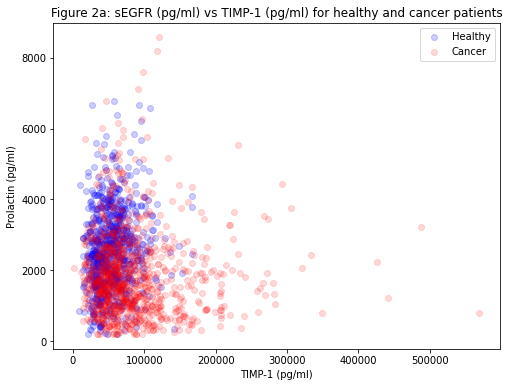

In [ ]:
# Visualize the data using Matplotlib
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,6))

#filter healthy patients and plot levels of Glucose vs BMI
healthy = df[df["Tumor type_Normal"] == 1]   
plt.scatter(        
    healthy['TIMP-1 (pg/ml)'],        
    healthy['sEGFR (pg/ml)'],
    color="blue",        
    alpha=0.2,        
    label="Healthy")
#filter diabete patients and plot levels of Glucose vs BMI
cancer = df[df["Tumor type_Normal"] == 0]  
plt.scatter(        
    cancer['TIMP-1 (pg/ml)'],        
    cancer['sEGFR (pg/ml)'],
    color="red",        
    alpha=0.15,        
    label="Cancer")

plt.xlabel('TIMP-1 (pg/ml)')
plt.ylabel('sEGFR (pg/ml)')
plt.title('Figure 2a: sEGFR (pg/ml) vs TIMP-1 (pg/ml) for healthy and cancer patients')
plt.legend(loc='upper right')
plt.show()

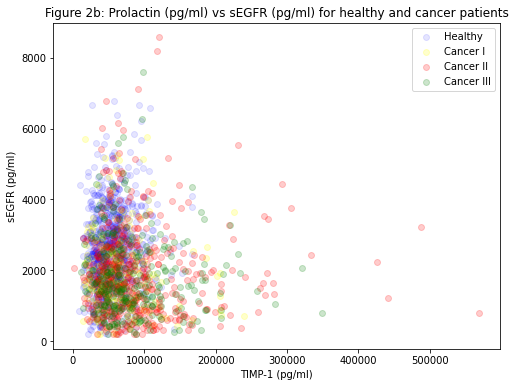

In [ ]:
# Visualize the data using Matplotlib
import matplotlib.pyplot as plt

f = plt.figure(figsize=(8,6))

#filter healthy patients and plot levels of Glucose vs BMI
healthy = df[df["Tumor type_Normal"] == 1]   
plt.scatter(        
    healthy['TIMP-1 (pg/ml)'],        
    healthy['sEGFR (pg/ml)'],
    color="blue",        
    alpha=0.1,        
    label="Healthy")
#filter diabete patients and plot levels of Glucose vs BMI
cancerI = df[(df["Tumor type_Normal"] == 0) & (df["AJCC Stage_I"]==1)] 
plt.scatter(        
    cancerI['TIMP-1 (pg/ml)'],        
    cancerI['sEGFR (pg/ml)'],
    color="yellow",        
    alpha=0.2,        
    label="Cancer I")
cancerII = df[(df["Tumor type_Normal"] == 0) & (df["AJCC Stage_II"]==1)]
plt.scatter(        
    cancerII['TIMP-1 (pg/ml)'],        
    cancerII['sEGFR (pg/ml)'],
    color="red",        
    alpha=0.2,        
    label="Cancer II")
cancerIII = df[(df["Tumor type_Normal"] == 0) & (df["AJCC Stage_III"]==1)]
plt.scatter(        
    cancerIII['TIMP-1 (pg/ml)'],        
    cancerIII['sEGFR (pg/ml)'],
    color="green",        
    alpha=0.2,        
    label="Cancer III")

plt.xlabel('TIMP-1 (pg/ml)')
plt.ylabel('sEGFR (pg/ml)')
plt.title('Figure 2b: Prolactin (pg/ml) vs sEGFR (pg/ml) for healthy and cancer patients')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df_corr.reindex(df_corr.abs().sort_values(ascending= False).index)

Tumor type_Normal              1.000000
AJCC Stage_II                 -0.550802
OPN (pg/ml)                   -0.456281
AJCC Stage_III                -0.405250
Prolactin (pg/ml)             -0.324163
AJCC Stage_I                  -0.313584
TIMP-1 (pg/ml)                -0.301189
sEGFR (pg/ml)                  0.278841
GDF15 (ng/ml)                 -0.245455
HGF (pg/ml)                   -0.241211
Myeloperoxidase (ng/ml)       -0.221475
FGF2 (pg/ml)                  -0.187811
IL-6 (pg/ml)                  -0.185722
Galectin-3 (ng/ml)            -0.180523
Angiopoietin-2 (pg/ml)        -0.169013
OPG (ng/ml)                   -0.146025
HE4 (pg/ml)                   -0.138947
Follistatin (pg/ml)           -0.136512
CEA (pg/ml)                   -0.126163
G-CSF (pg/ml)                 -0.125261
Thrombospondin-2 (pg/ml)      -0.114528
SHBG (nM)                     -0.106979
Mesothelin (ng/ml)            -0.098983
NSE (ng/ml)                    0.098140
CA-125 (U/ml)                 -0.095475


### 2.Data preprocessing

In [ ]:
df = df.reset_index()

In [ ]:
df.rename(columns = {'Table S6. Concentrations of assayed protein biomarker in plasma samples from cancer patients and healthy controls.':'Patient ID'}, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric] = pd.DataFrame(scaler.fit_transform(df[numeric]),columns=df[numeric].columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

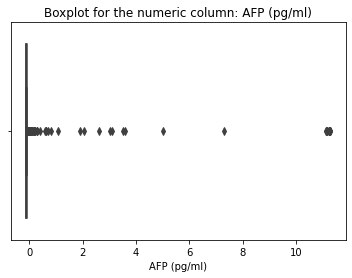

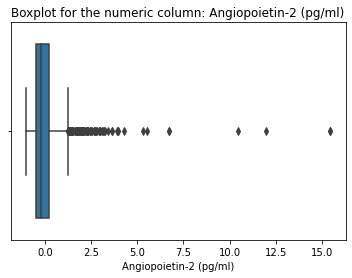

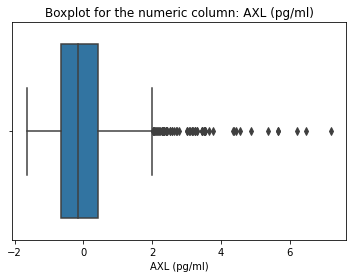

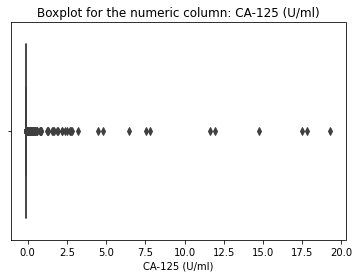

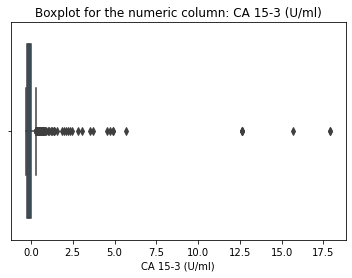

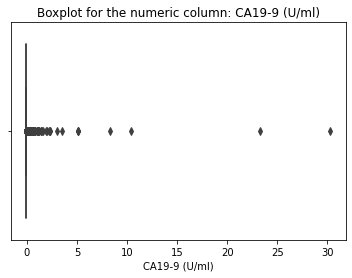

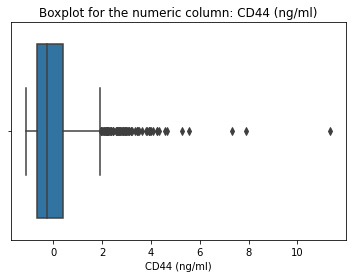

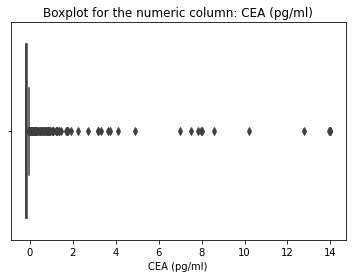

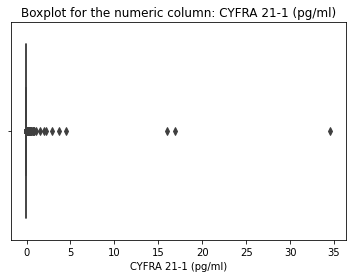

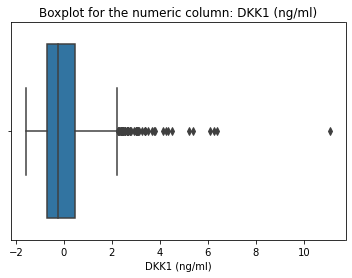

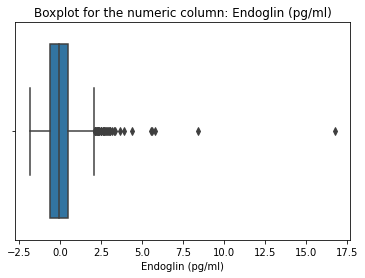

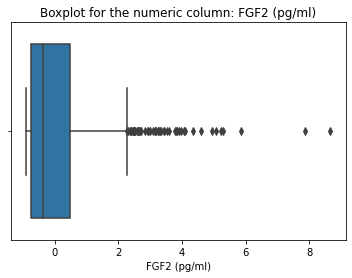

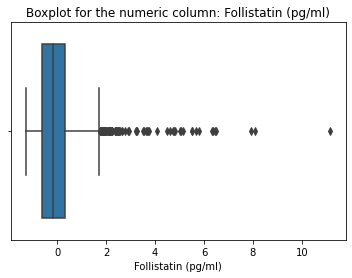

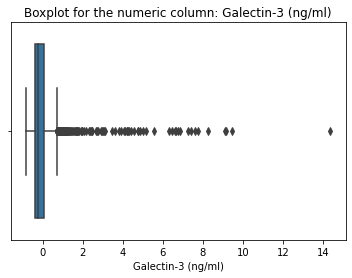

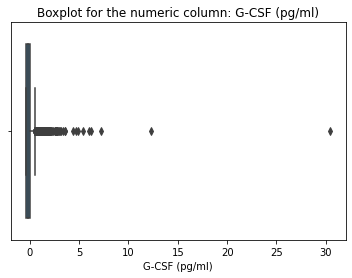

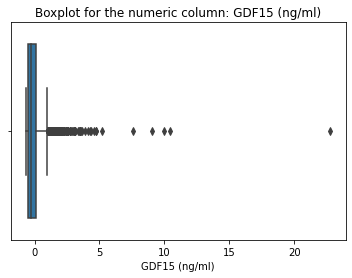

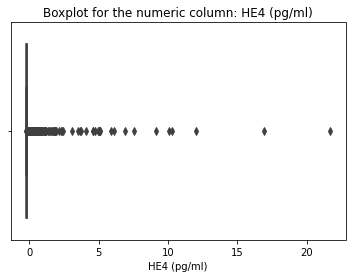

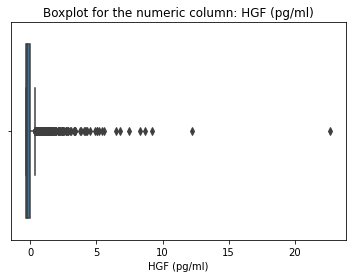

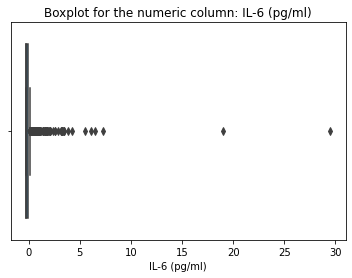

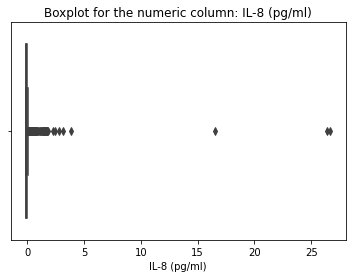

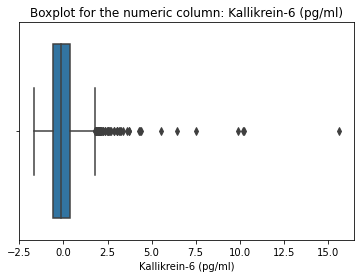

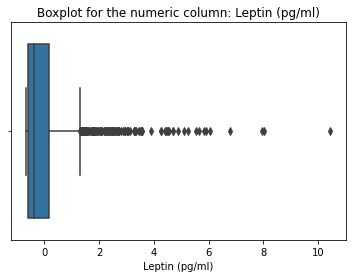

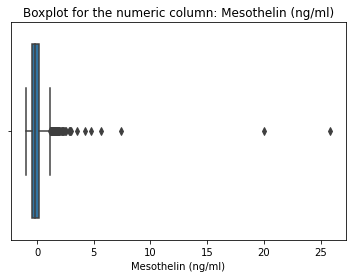

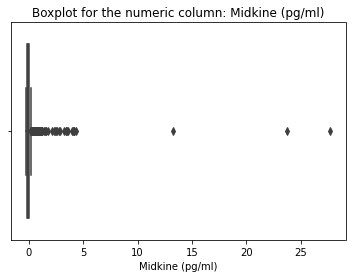

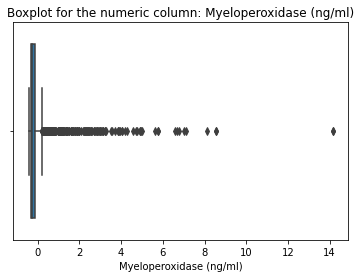

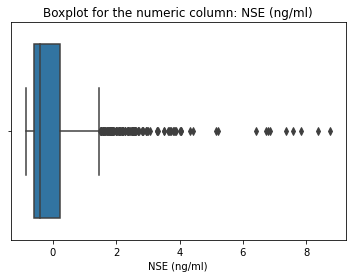

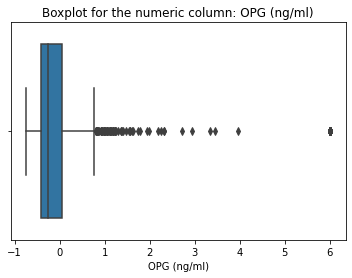

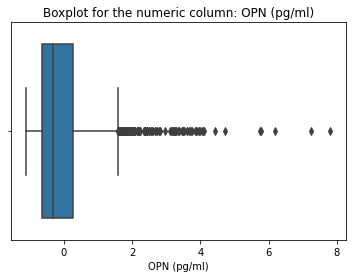

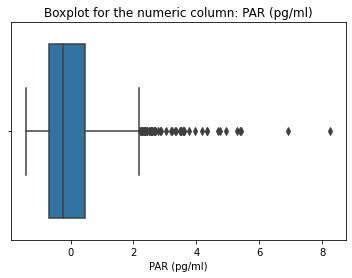

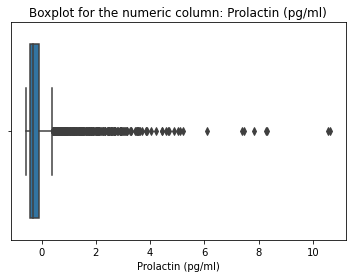

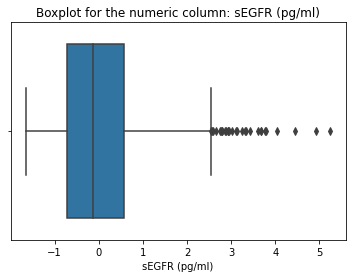

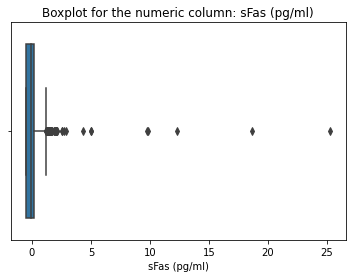

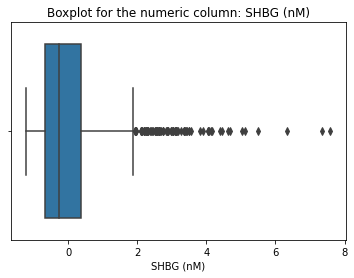

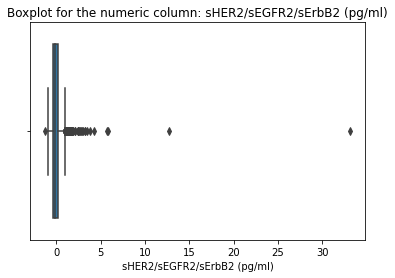

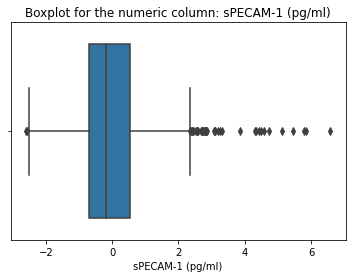

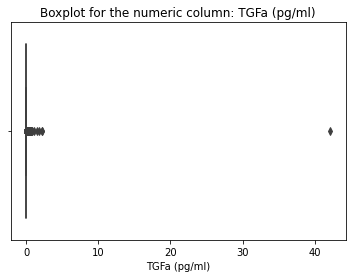

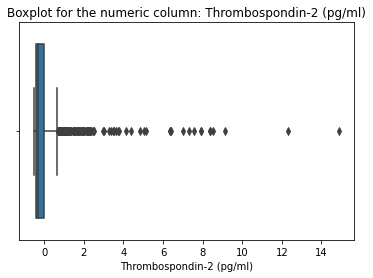

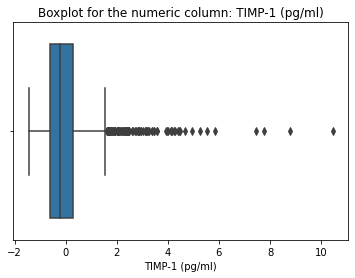

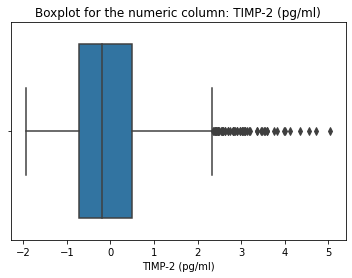

In [ ]:
import seaborn as sns
i=0
for num in numeric:
    plt.figure(i)
    plt.title("Boxplot for the numeric column: " + num)
    sns.boxplot(df[num])
    i+=1

### 3. Clustering and Features analysis

### 4. Prediction

#### A. Cancer Prediction - Prototype 1

##### a. Cancer - YES/NO classification

In [ ]:
x_columns = intersting_columns[4:]
X = df[x_columns]
y = df[["Tumor type_Normal","Tumor type_Breast","Tumor type_Colorectum","Tumor type_Stomach","Tumor type_Pancreas","Tumor type_Ovary","Tumor type_Lung","Tumor type_Liver","Tumor type_Esophagus"]]

In [ ]:
#split data into training and testing 80%training 20%testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_after, y_test_after = train_test_split(X, y, test_size=0.3)
y_test = y_test_after["Tumor type_Normal"]
y_train = y_train_after["Tumor type_Normal"]

In [ ]:
X

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,-0.122608,10.467237,0.296029,-0.097508,-0.165150,-0.032199,0.707744,0.060796,-0.068752,-0.636849,...,-0.331096,-0.239827,-0.504768,0.093746,-0.049529,0.158451,-0.042639,2.367310,0.079248,0.080175
1,-0.053151,0.242445,1.278522,-0.110547,-0.058007,-0.091765,-0.435277,-0.146410,-0.067852,-0.343316,...,0.112283,-0.378016,-0.504768,1.955393,-0.471773,-0.844135,0.530381,0.051922,-0.992628,-0.907535
2,-0.122608,-0.168292,-0.245584,-0.107654,-0.191936,-0.091765,-1.034966,-0.102108,-0.068752,-0.930382,...,-0.373632,-0.941654,-0.504768,-0.708242,0.020384,0.111214,-0.042639,-0.113485,-1.042008,-1.103274
3,-0.120971,0.097557,-0.217002,-0.110547,-0.138984,-0.091765,-0.644860,-0.161514,-0.068752,-0.614270,...,-0.158489,-0.383794,-0.504768,0.188803,-0.072688,0.507260,-0.042639,-0.311167,-0.290708,0.707135
4,-0.122608,-0.419596,-0.227404,-0.110547,-0.235598,-0.035609,-1.106295,-0.135122,-0.068752,-0.682008,...,-0.289940,-0.273322,-0.504768,3.395096,0.112379,0.946132,-0.042639,0.398889,-0.509058,0.626898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,-0.119483,-0.234112,-0.196890,-0.002793,-0.161124,-0.028595,-0.406217,-0.148922,-0.067994,4.511272,...,0.479770,0.279154,-0.503731,0.874877,-0.085830,1.223621,-0.039812,-0.478831,2.046379,0.761258
1798,-0.110772,-0.166334,-1.103994,-0.106629,-0.168866,-0.091794,-0.635173,-0.137760,-0.067994,1.553360,...,2.873312,-0.438701,-0.503731,1.464232,0.498215,3.261691,-0.039812,-0.478831,1.116755,1.064298
1799,-0.119483,-0.174619,-0.963976,0.027753,-0.189303,-0.091794,-0.992697,-0.168723,-0.029945,-0.727167,...,3.863733,-0.830696,-0.503731,0.679041,-0.768685,-1.831531,-0.039812,-0.478831,0.710731,-0.030094
1800,-0.119483,1.847247,-0.671491,7.793676,0.046968,0.019798,-0.264440,-0.168723,1.076373,0.424386,...,1.992409,-0.490612,-0.503731,0.105374,-0.612805,-0.261190,-0.039812,0.134540,0.847136,0.206676


###### i. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

#create the model and training
logistic_rg = LogisticRegression()
logistic_rg = logistic_rg.fit(X_train, y_train)

#predict the output
y_pred = logistic_rg.predict(X_test)

#measure accuracy
acc = accuracy_score(y_test, y_pred)

# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.87      0.90       296
           1       0.85      0.93      0.89       245

    accuracy                           0.89       541
   macro avg       0.89      0.90      0.89       541
weighted avg       0.90      0.89      0.89       541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

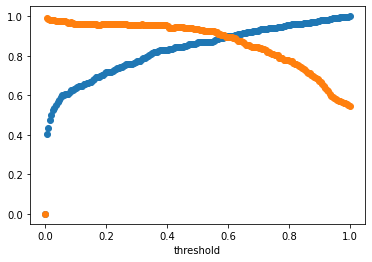

recall:[0.0, 0.40540540540540543, 0.4358108108108108, 0.47297297297297297, 0.5, 0.5236486486486487, 0.5337837837837838, 0.5506756756756757, 0.5641891891891891, 0.5743243243243243, 0.5912162162162162, 0.6013513513513513, 0.6013513513513513, 0.6047297297297297, 0.6081081081081081, 0.6081081081081081, 0.6182432432432432, 0.625, 0.625, 0.6317567567567568, 0.6351351351351351, 0.6418918918918919, 0.6452702702702703, 0.6452702702702703, 0.6486486486486487, 0.6587837837837838, 0.6587837837837838, 0.6621621621621622, 0.6621621621621622, 0.6655405405405406, 0.668918918918919, 0.6790540540540541, 0.6824324324324325, 0.6925675675675675, 0.6925675675675675, 0.6925675675675675, 0.6959459459459459, 0.7027027027027027, 0.7027027027027027, 0.7128378378378378, 0.7162162162162162, 0.7162162162162162, 0.7162162162162162, 0.7195945945945946, 0.722972972972973, 0.7263513513513513, 0.7331081081081081, 0.7364864864864865, 0.7398648648648649, 0.7432432432432432, 0.7432432432432432, 0.7466216216216216, 0.753378

0.585

In [ ]:
def plot_recall_vs_threshold(modelclf,X_test,y_test):
  x = np.linspace(0,1,200)

  rec = []
  prec = []
  for a in x:
    preds = np.where(modelclf.predict_proba(X_test)[:,1] > a, 1, 0)
    report = classification_report(y_test, preds, output_dict=True )
    rec.append(report['0']['recall'] )
    prec.append(report['0']['precision'])
  plt.xlabel('threshold')
  plt.scatter(x, rec)
  plt.scatter(x, prec)
  plt.show()
  print("recall:"+str(rec))
  print('precision'+str(prec))
  idx = np.argwhere(np.diff(np.sign(np.array(prec) - np.array(rec)))).flatten()/200
  return idx[-1]
plot_recall_vs_threshold(logistic_rg,X_test,y_test)

###### ii. SVM

Polynomial Kernel

In [ ]:
from sklearn import svm
#create the model and training
clf = svm.SVC(kernel = 'poly')
clf = clf.fit(X_train, y_train)

#predict the output
y_pred = clf.predict(X_test)

#measure accuracy
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.55      0.71       296
           1       0.65      0.99      0.78       245

    accuracy                           0.75       541
   macro avg       0.81      0.77      0.74       541
weighted avg       0.83      0.75      0.74       541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

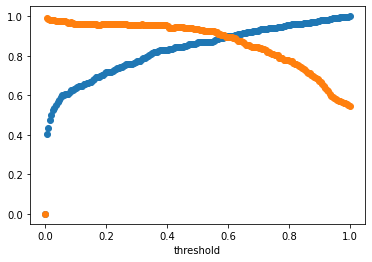

recall:[0.0, 0.40540540540540543, 0.4358108108108108, 0.47297297297297297, 0.5, 0.5236486486486487, 0.5337837837837838, 0.5506756756756757, 0.5641891891891891, 0.5743243243243243, 0.5912162162162162, 0.6013513513513513, 0.6013513513513513, 0.6047297297297297, 0.6081081081081081, 0.6081081081081081, 0.6182432432432432, 0.625, 0.625, 0.6317567567567568, 0.6351351351351351, 0.6418918918918919, 0.6452702702702703, 0.6452702702702703, 0.6486486486486487, 0.6587837837837838, 0.6587837837837838, 0.6621621621621622, 0.6621621621621622, 0.6655405405405406, 0.668918918918919, 0.6790540540540541, 0.6824324324324325, 0.6925675675675675, 0.6925675675675675, 0.6925675675675675, 0.6959459459459459, 0.7027027027027027, 0.7027027027027027, 0.7128378378378378, 0.7162162162162162, 0.7162162162162162, 0.7162162162162162, 0.7195945945945946, 0.722972972972973, 0.7263513513513513, 0.7331081081081081, 0.7364864864864865, 0.7398648648648649, 0.7432432432432432, 0.7432432432432432, 0.7466216216216216, 0.753378

0.585

In [ ]:
plot_recall_vs_threshold(logistic_rg,X_test,y_test)

 Gaussian Kernel

In [ ]:
#create the model and training
SVMclf = svm.SVC(kernel = 'rbf')
SVMclf = SVMclf.fit(X_train, y_train)

#predict the output
y_pred = SVMclf.predict(X_test)

#measure accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(acc))

print(classification_report(y_test, y_pred))

Test set accuracy: 0.9002
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       296
           1       0.86      0.93      0.89       245

    accuracy                           0.90       541
   macro avg       0.90      0.90      0.90       541
weighted avg       0.90      0.90      0.90       541



In [ ]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.01,0.1,1,10,100],
              'gamma': ['scale'],
              'kernel': ['rbf','linear','poly'],
              'degree': [3,4,5]
              }
 
grid = GridSearchCV(svm.SVC(probability=True), param_grid, refit = True, verbose = 3,scoring = 'recall',cv=3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END C=0.01, degree=3, gamma=scale, kernel=rbf;, score=0.000 total time=   0.5s
[CV 2/3] END C=0.01, degree=3, gamma=scale, kernel=rbf;, score=0.000 total time=   0.3s
[CV 3/3] END C=0.01, degree=3, gamma=scale, kernel=rbf;, score=0.000 total time=   0.3s
[CV 1/3] END C=0.01, degree=3, gamma=scale, kernel=linear;, score=0.935 total time=   0.1s
[CV 2/3] END C=0.01, degree=3, gamma=scale, kernel=linear;, score=0.886 total time=   0.1s
[CV 3/3] END C=0.01, degree=3, gamma=scale, kernel=linear;, score=0.913 total time=   0.1s
[CV 1/3] END C=0.01, degree=3, gamma=scale, kernel=poly;, score=0.000 total time=   0.2s
[CV 2/3] END C=0.01, degree=3, gamma=scale, kernel=poly;, score=0.000 total time=   0.2s
[CV 3/3] END C=0.01, degree=3, gamma=scale, kernel=poly;, score=0.000 total time=   0.2s
[CV 1/3] END C=0.01, degree=4, gamma=scale, kernel=rbf;, score=0.000 total time=   0.3s
[CV 2/3] END C=0.01, degree=4, gamma=scale, ke

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale'],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='recall', verbose=3)

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.55      0.71       296
           1       0.65      0.99      0.78       245

    accuracy                           0.75       541
   macro avg       0.81      0.77      0.74       541
weighted avg       0.83      0.75      0.74       541



In [ ]:
grid.best_estimator_

SVC(C=1, kernel='poly', probability=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

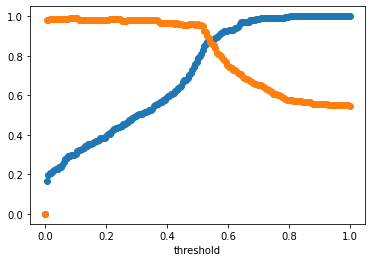

recall:[0.0, 0.16554054054054054, 0.19594594594594594, 0.20945945945945946, 0.20945945945945946, 0.2195945945945946, 0.22297297297297297, 0.22972972972972974, 0.22972972972972974, 0.23648648648648649, 0.23986486486486486, 0.24662162162162163, 0.2635135135135135, 0.27702702702702703, 0.28040540540540543, 0.2905405405405405, 0.2939189189189189, 0.2972972972972973, 0.2972972972972973, 0.2972972972972973, 0.30405405405405406, 0.31756756756756754, 0.32094594594594594, 0.32432432432432434, 0.3277027027027027, 0.3344594594594595, 0.34459459459459457, 0.34459459459459457, 0.35135135135135137, 0.35135135135135137, 0.3547297297297297, 0.3581081081081081, 0.36486486486486486, 0.36824324324324326, 0.36824324324324326, 0.3716216216216216, 0.38175675675675674, 0.38175675675675674, 0.38513513513513514, 0.38513513513513514, 0.3952702702702703, 0.40202702702702703, 0.40540540540540543, 0.41216216216216217, 0.4222972972972973, 0.42905405405405406, 0.4358108108108108, 0.4358108108108108, 0.43918918918918

0.535

In [ ]:
plot_recall_vs_threshold(grid,X_test,y_test)

###### iii. Neural Networks

Simple Neural Network




LeakyRelu activation (negative values)

Epoch 1/300
40/40 [==============================] - 1s 7ms/step - loss: 0.6929 - accuracy: 0.5155 - val_loss: 0.6884 - val_accuracy: 0.5490
Epoch 2/300
40/40 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5583 - val_loss: 0.6828 - val_accuracy: 0.5453
Epoch 3/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5599 - val_loss: 0.6775 - val_accuracy: 0.5471
Epoch 4/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5607 - val_loss: 0.6714 - val_accuracy: 0.5471
Epoch 5/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.5607 - val_loss: 0.6645 - val_accuracy: 0.5471
Epoch 6/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.5607 - val_loss: 0.6561 - val_accuracy: 0.5490
Epoch 7/300
40/40 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.5638 - val_loss: 0.6463 - val_accuracy: 0.5619
Epoch 8/300
4

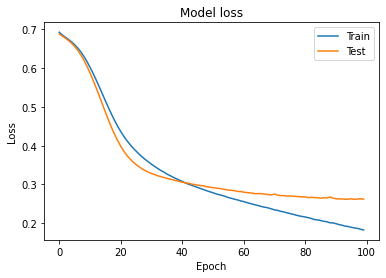

In [ ]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense
from keras.constraints import maxnorm
from keras.layers import LeakyReLU
# Create a sequential model
nnmodel = Sequential()

# Add a dense layer 

nnmodel.add(Dense(128, input_dim=39, activation=LeakyReLU()))
nnmodel.add(Dense(64, activation = LeakyReLU(), kernel_constraint=maxnorm(3), kernel_initializer="uniform"))
nnmodel.add(Dense(16, activation = LeakyReLU(), kernel_initializer="uniform"))
nnmodel.add(Dense(1, activation='sigmoid'))

# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor="val_loss", 
                       patience=6)

# Compile the model
nnmodel.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Train the model using the early stopping callback
h_callback = nnmodel.fit(X_train, y_train, 
           epochs=300, validation_data=(X_test,y_test),
           callbacks= [monitor_val_acc])


def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history["loss"], h_callback.history["val_loss"])


In [ ]:

#predict the output
y_pred = nnmodel.predict(X_test)
y_pred =  [1 if x > 0.5 else 0 for x in y_pred]
print(classification_report(y_test, pd.DataFrame(y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       296
           1       0.88      0.93      0.90       245

    accuracy                           0.91       541
   macro avg       0.91      0.91      0.91       541
weighted avg       0.91      0.91      0.91       541



In [ ]:
def plot_recall_vs_threshold1(modelclf,X_test,y_test):
  x = np.linspace(0,1,200)

  rec = []
  prec = []
  for a in x:
    preds = np.where(modelclf.predict(X_test) > a, 1, 0)
    report = classification_report(y_test, preds, output_dict=True )
    rec.append(report['0']['recall'] )
    prec.append(report['0']['precision'])
  plt.xlabel('threshold')
  plt.scatter(x, rec)
  plt.scatter(x, prec)
  plt.show()
  idx = np.argwhere(np.diff(np.sign(np.array(prec) - np.array(rec)))).flatten()/200
  return idx[-1]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

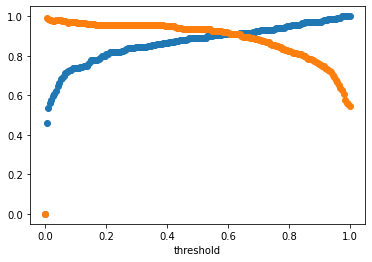

0.61

In [ ]:
plot_recall_vs_threshold1(nnmodel,X_test,y_test)

Multilayer perceptron


Indentity Activation

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation = 'identity',solver='lbfgs', alpha=1e-5, random_state=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

 #measure accuracy
acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, pd.DataFrame(y_pred)))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       296
           1       0.86      0.91      0.89       245

    accuracy                           0.89       541
   macro avg       0.89      0.90      0.89       541
weighted avg       0.90      0.89      0.89       541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

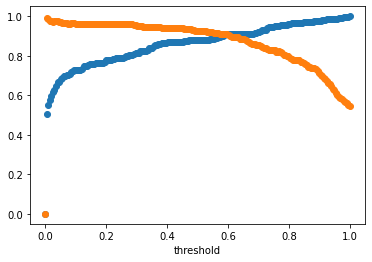

recall:[0.0, 0.5067567567567568, 0.5506756756756757, 0.5777027027027027, 0.597972972972973, 0.6148648648648649, 0.6283783783783784, 0.6486486486486487, 0.6655405405405406, 0.668918918918919, 0.6824324324324325, 0.6891891891891891, 0.6959459459459459, 0.6959459459459459, 0.7027027027027027, 0.7027027027027027, 0.706081081081081, 0.7162162162162162, 0.722972972972973, 0.7263513513513513, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7331081081081081, 0.7466216216216216, 0.75, 0.75, 0.7533783783783784, 0.7567567567567568, 0.7567567567567568, 0.7567567567567568, 0.7601351351351351, 0.7635135135135135, 0.7635135135135135, 0.7635135135135135, 0.7635135135135135, 0.7635135135135135, 0.7635135135135135, 0.7668918918918919, 0.777027027027027, 0.777027027027027, 0.7804054054054054, 0.7804054054054054, 0.7837837837837838, 0.7837837837837838, 0.7871621621621622, 0.7905405405405406, 0.7905405405405406, 0.7905405405405406, 0.7905405405405406, 0.7905405405405406, 0

0.595

In [ ]:
plot_recall_vs_threshold(clf,X_test,y_test)

RELU

In [ ]:
clf = MLPClassifier(activation = 'relu',solver='lbfgs', alpha=1e-5, random_state=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
 #measure accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(acc))

print(classification_report(y_test, pd.DataFrame(y_pred)))

Test set accuracy: 0.9113
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       296
           1       0.90      0.90      0.90       245

    accuracy                           0.91       541
   macro avg       0.91      0.91      0.91       541
weighted avg       0.91      0.91      0.91       541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


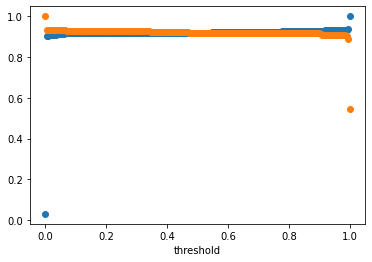

recall:[0.030405405405405407, 0.902027027027027, 0.9054054054054054, 0.9087837837837838, 0.9087837837837838, 0.9087837837837838, 0.9087837837837838, 0.9087837837837838, 0.9121621621621622, 0.9121621621621622, 0.9121621621621622, 0.9121621621621622, 0.9121621621621622, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.9155405405405406, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918919, 0.918918918918

0.54

In [ ]:
plot_recall_vs_threshold(clf,X_test,y_test)

###### iv. Random Forest

Simple Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [ ]:
res = clf.predict(X_test)

# print classification report
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       296
           1       0.96      0.95      0.96       245

    accuracy                           0.96       541
   macro avg       0.96      0.96      0.96       541
weighted avg       0.96      0.96      0.96       541



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

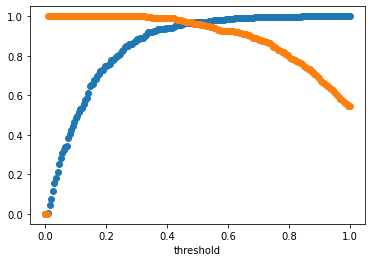

recall:[0.0, 0.0, 0.0033783783783783786, 0.0472972972972973, 0.07432432432432433, 0.11486486486486487, 0.1554054054054054, 0.18243243243243243, 0.21283783783783783, 0.25, 0.28378378378378377, 0.30743243243243246, 0.32094594594594594, 0.33783783783783783, 0.34121621621621623, 0.38175675675675674, 0.40202702702702703, 0.4222972972972973, 0.44256756756756754, 0.46621621621621623, 0.4831081081081081, 0.4966216216216216, 0.5168918918918919, 0.5304054054054054, 0.5371621621621622, 0.5540540540540541, 0.5743243243243243, 0.5878378378378378, 0.6114864864864865, 0.6452702702702703, 0.652027027027027, 0.6587837837837838, 0.6756756756756757, 0.6824324324324325, 0.6959459459459459, 0.7094594594594594, 0.722972972972973, 0.7263513513513513, 0.7297297297297297, 0.7466216216216216, 0.75, 0.7533783783783784, 0.7567567567567568, 0.777027027027027, 0.7804054054054054, 0.7837837837837838, 0.793918918918919, 0.8006756756756757, 0.8040540540540541, 0.8074324324324325, 0.8243243243243243, 0.831081081081081,

0.48

In [ ]:
plot_recall_vs_threshold(clf,X_test,y_test)

Hyperparameter Optimization

In [ ]:
param_grid = { 
    'n_estimators': [10,20,50,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
pred=CV_rfc.predict(X_test)
# print classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       296
           1       0.97      0.95      0.96       245

    accuracy                           0.96       541
   macro avg       0.97      0.96      0.96       541
weighted avg       0.96      0.96      0.96       541



##### b. Cancer Classification

Prepare data for classification
*Remove normal cases and classify cancer types from 1-->8*

In [ ]:
y_train_list = y_train.values.tolist()

#remove from training set healthy individual as we are teaching models to specify the type of cancer\
#binary classifcation was made in part a.)
index_remove = [i for i in range(len(y_train_list)) if y_train_list[i] == 1]
X_train.reset_index(inplace=True)
X_train.drop(index_remove,inplace = True)
y_train = y_train_after[["Tumor type_Normal","Tumor type_Breast","Tumor type_Colorectum","Tumor type_Stomach","Tumor type_Pancreas","Tumor type_Ovary","Tumor type_Lung","Tumor type_Liver","Tumor type_Esophagus"]]
y_train.reset_index(inplace=True)
y_train.drop(index_remove,inplace = True)
y_train_neuron = y_train
y_train_neuron.drop("index",axis=1.,inplace=True)
index_remove = [i for i in range(len(y_pred)) if y_pred[i] == 1]

X_test.reset_index(inplace = True)
X_test.drop(index_remove,inplace = True)

y_test = y_test_after[["Tumor type_Normal","Tumor type_Breast","Tumor type_Colorectum","Tumor type_Stomach","Tumor type_Pancreas","Tumor type_Ovary","Tumor type_Lung","Tumor type_Liver","Tumor type_Esophagus"]]
y_test.reset_index(inplace=True)
y_test.drop(index_remove,inplace = True)
y_test_neuron = y_test
y_test_neuron.drop("index",axis=1.,inplace=True)


def refine_output(y_used):
  y= []
  for e in y_used.values.tolist():
    if(e[0:9]==[0,0,0,0,0,0,0,0,1]):
      y.append(1)
    if(e[0:9]==[0,0,0,0,0,0,0,1,0]):
      y.append(2)
    if(e[0:9]==[0,0,0,0,0,0,1,0,0]):
      y.append(3)
    if(e[0:9]==[0,0,0,0,0,1,0,0,0]):
      y.append(4)
    if(e[0:9]==[0,0,0,0,1,0,0,0,0]):
      y.append(5)
    if(e[0:9]==[0,0,0,1,0,0,0,0,0]):
      y.append(6)
    if(e[0:9]==[0,0,1,0,0,0,0,0,0]):
      y.append(7)
    if(e[0:9]==[0,1,0,0,0,0,0,0,0]):
      y.append(8)
    if(e[0:9]==[1,0,0,0,0,0,0,0,0]):
      y.append(9)
  return y

y_train = pd.DataFrame(refine_output(y_train))
y_test = pd.DataFrame(refine_output(y_test))

###### i. Multioutput logistic regression (OVR)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression(max_iter=100000,solver='liblinear')

ovr = OneVsRestClassifier(model)
ovr.fit(X_train,y_train)
y_pred = ovr.predict(X_test)


print(classification_report(y_test, pd.DataFrame(y_pred)))
viz = pd.DataFrame(y_test.values.tolist(),columns=['true'])
viz['pred'] = pd.DataFrame(y_pred)

              precision    recall  f1-score   support

           1       0.25      0.14      0.18        14
           2       0.75      0.38      0.50        16
           3       0.57      0.36      0.44        33
           4       0.85      0.85      0.85        13
           5       0.84      0.84      0.84        32
           6       0.33      0.27      0.30        11
           7       0.62      0.82      0.71       104
           8       0.49      0.69      0.58        49
           9       0.00      0.00      0.00        24

    accuracy                           0.61       296
   macro avg       0.52      0.48      0.49       296
weighted avg       0.56      0.61      0.57       296



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


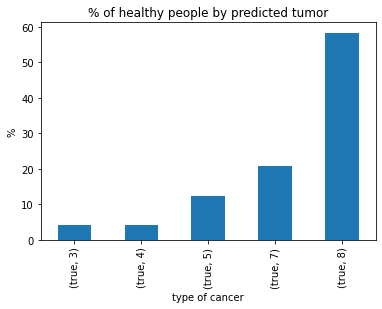

In [ ]:
viz[viz['true']==9].groupby('pred').count().apply(lambda x: 100*x/x.sum()).unstack().plot(kind='bar',title="% of healthy people by predicted tumor",xlabel='type of cancer',ylabel='%')


###### ii. Neural Network Multi-output classifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

 #measure accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(acc))

print(classification_report(y_test, pd.DataFrame(y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set accuracy: 0.4966
              precision    recall  f1-score   support

           1       0.20      0.14      0.17        14
           2       0.50      0.31      0.38        16
           3       0.23      0.09      0.13        33
           4       0.56      0.69      0.62        13
           5       0.61      0.78      0.68        32
           6       0.20      0.36      0.26        11
           7       0.58      0.68      0.63       104
           8       0.44      0.57      0.50        49
           9       0.00      0.00      0.00        24

    accuracy                           0.50       296
   macro avg       0.37      0.40      0.37       296
weighted avg       0.44      0.50      0.46       296



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

###### iii. Random Forest Multi-output Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_depth=8)

In [ ]:
res = clf.predict(X_test)

# print classification report
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.67      0.12      0.21        16
           3       0.90      0.27      0.42        33
           4       0.92      0.85      0.88        13
           5       0.76      0.81      0.79        32
           6       0.00      0.00      0.00        11
           7       0.58      0.94      0.72       104
           8       0.55      0.73      0.63        49
           9       0.00      0.00      0.00        24

    accuracy                           0.61       296
   macro avg       0.49      0.41      0.40       296
weighted avg       0.55      0.61      0.54       296



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### iv. SVM multi-output classifier

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#calculate MAE


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.10      0.14      0.12        14
           2       0.46      0.38      0.41        16
           3       0.46      0.36      0.41        33
           4       0.53      0.77      0.62        13
           5       0.84      0.81      0.83        32
           6       0.15      0.27      0.19        11
           7       0.69      0.73      0.71       104
           8       0.56      0.65      0.60        49
           9       0.00      0.00      0.00        24

    accuracy                           0.56       296
   macro avg       0.42      0.46      0.43       296
weighted avg       0.54      0.56      0.55       296



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### B. Cancer Prediction - Prototype 2

###### Data split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def refine_output(y_used):
  y= []
  for e in y_used.values.tolist():
    if(e[0:9]==[0,0,0,0,0,0,0,0,1]):
      y.append(1)
    if(e[0:9]==[0,0,0,0,0,0,0,1,0]):
      y.append(2)
    if(e[0:9]==[0,0,0,0,0,0,1,0,0]):
      y.append(3)
    if(e[0:9]==[0,0,0,0,0,1,0,0,0]):
      y.append(4)
    if(e[0:9]==[0,0,0,0,1,0,0,0,0]):
      y.append(5)
    if(e[0:9]==[0,0,0,1,0,0,0,0,0]):
      y.append(6)
    if(e[0:9]==[0,0,1,0,0,0,0,0,0]):
      y.append(7)
    if(e[0:9]==[0,1,0,0,0,0,0,0,0]):
      y.append(8)
    if(e[0:9]==[1,0,0,0,0,0,0,0,0]):
      y.append(9)
  return y

y_train = pd.DataFrame(refine_output(y_train))
y_test = pd.DataFrame(refine_output(y_test))

###### i. Logistic Regression - OVR

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression(max_iter=100000,solver='liblinear')

ovr = OneVsRestClassifier(model)
ovr.fit(X_train,y_train)
y_pred = ovr.predict(X_test)


def print_classification_forProto2(y_pred1,y_test1):
  y_temp_pred = [0 if x!=9 else 1 for x in y_pred1]
  y_temp_test = [0 if x[0]!=9 else 1 for x in y_test1.values.tolist()]
  print(classification_report(pd.DataFrame(y_temp_test), pd.DataFrame(y_temp_pred)))

print_classification_forProto2(y_pred,y_test)
print(classification_report(y_test, pd.DataFrame(y_pred)))
viz = pd.DataFrame(y_test.values.tolist(),columns=['true'])
viz['pred'] = pd.DataFrame(y_pred)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       305
           1       0.75      0.97      0.85       236

    accuracy                           0.84       541
   macro avg       0.86      0.86      0.84       541
weighted avg       0.88      0.84      0.84       541

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.80      0.57      0.67        14
           3       0.60      0.44      0.51        34
           4       0.89      0.89      0.89        19
           5       0.78      0.67      0.72        21
           6       0.57      0.19      0.29        21
           7       0.64      0.63      0.63       130
           8       0.36      0.17      0.23        48
           9       0.75      0.97      0.85       236

    accuracy                           0.70       541
   macro avg       0.60      0.50      0.53       541
weighted avg       0.65

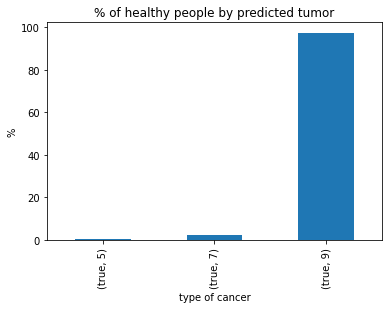

In [ ]:
viz[viz['true']==9].groupby('pred').count().apply(lambda x: 100*x/x.sum()).unstack().plot(kind='bar',title="% of healthy people by predicted tumor",xlabel='type of cancer',ylabel='%')


###### ii. MLP Classifier

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

 #measure accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(acc))
print_classification_forProto2(y_pred,y_test)
print(classification_report(y_test, pd.DataFrame(y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test set accuracy: 0.6895
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       305
           1       0.87      0.90      0.88       236

    accuracy                           0.89       541
   macro avg       0.89      0.90      0.89       541
weighted avg       0.90      0.89      0.89       541

              precision    recall  f1-score   support

           1       0.14      0.11      0.12        18
           2       0.75      0.43      0.55        14
           3       0.50      0.50      0.50        34
           4       0.70      0.74      0.72        19
           5       0.67      0.67      0.67        21
           6       0.22      0.24      0.23        21
           7       0.67      0.64      0.65       130
           8       0.38      0.42      0.40        48
           9       0.87      0.90      0.88       236

    accuracy                           0.69       541
   macro avg       0.54      0.51      0.52       5

###### iii. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=7)
clf.fit(X_train, y_train)
res = clf.predict(X_test)

# print classification report
print_classification_forProto2(res,y_test)
print(classification_report(y_test, res))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.99      0.89      0.94       305
           1       0.87      0.99      0.93       236

    accuracy                           0.93       541
   macro avg       0.93      0.94      0.93       541
weighted avg       0.94      0.93      0.93       541

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       1.00      0.07      0.13        14
           3       0.17      0.03      0.05        34
           4       1.00      0.63      0.77        19
           5       0.93      0.62      0.74        21
           6       0.00      0.00      0.00        21
           7       0.60      0.92      0.73       130
           8       0.59      0.50      0.54        48
           9       0.87      0.99      0.93       236

    accuracy                           0.75       541
   macro avg       0.57      0.42      0.43       541
weighted avg       0.69

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### iv. SVM - Interesting Results

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print classification report
print_classification_forProto2(y_pred,y_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.82      0.87       305
           1       0.80      0.92      0.86       236

    accuracy                           0.87       541
   macro avg       0.87      0.87      0.86       541
weighted avg       0.87      0.87      0.87       541

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.54      0.50      0.52        14
           3       0.50      0.35      0.41        34
           4       0.76      0.84      0.80        19
           5       0.71      0.71      0.71        21
           6       0.44      0.19      0.27        21
           7       0.63      0.72      0.67       130
           8       0.41      0.25      0.31        48
           9       0.80      0.92      0.86       236

    accuracy                           0.70       541
   macro avg       0.53      0.50      0.51       541
weighted avg       0.65

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print classification report
print_classification_forProto2(y_pred,y_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.77      0.87       305
           1       0.77      0.99      0.86       236

    accuracy                           0.87       541
   macro avg       0.88      0.88      0.87       541
weighted avg       0.89      0.87      0.87       541

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.75      0.21      0.33        14
           3       0.77      0.29      0.43        34
           4       1.00      0.37      0.54        19
           5       0.91      0.48      0.62        21
           6       0.00      0.00      0.00        21
           7       0.53      0.74      0.62       130
           8       0.38      0.17      0.23        48
           9       0.77      0.99      0.86       236

    accuracy                           0.68       541
   macro avg       0.57      0.36      0.40       541
weighted avg       0.63

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly', degree = 4) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# print classification report
print_classification_forProto2(y_pred,y_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.96      0.22      0.36       305
           1       0.49      0.99      0.66       236

    accuracy                           0.55       541
   macro avg       0.73      0.60      0.51       541
weighted avg       0.76      0.55      0.49       541

              precision    recall  f1-score   support

           1       0.29      0.11      0.16        18
           2       0.75      0.43      0.55        14
           3       0.80      0.12      0.21        34
           4       0.67      0.42      0.52        19
           5       1.00      0.29      0.44        21
           6       0.43      0.14      0.21        21
           7       0.56      0.08      0.14       130
           8       0.43      0.06      0.11        48
           9       0.49      0.99      0.66       236

    accuracy                           0.51       541
   macro avg       0.60      0.29      0.33       541
weighted avg       0.55